# Looking only at images with comments at least with min_words = 50

In [25]:
from aestheval.data.datasets import AVA, Reddit, PCCD
import torch
from tqdm import tqdm
SPLITS = ('train', 'validation', 'test')

ava_dataset = [AVA(split, dataset_path="/media/data-storage/datasets/ava", load_images=False, min_words=0) for split in SPLITS]
reddit_dataset = [Reddit(split, dataset_path="/media/data-storage/datasets/reddit", load_images=False, min_words=0) for split in SPLITS]
pccd_dataset = [PCCD(split, dataset_path="/media/data-storage/datasets/PCCD", load_images=False, min_words=0) for split in SPLITS]

dataset = torch.utils.data.ConcatDataset(ava_dataset + reddit_dataset + pccd_dataset)

In [26]:
len(dataset)

332016

In [27]:
ncomments={
    'ava':[],
    'reddit': [],
    'pccd':[]
    }
nwords={
    'ava':[],
    'reddit': [],
    'pccd':[]
    }
sentiment_mean_score={
    'ava':[],
    'reddit': [],
    'pccd':[]
    }
sentiment_stdev_score={
    'ava':[],
    'reddit': [],
    'pccd':[]
}
sentiment_len_score={
    'ava':[],
    'reddit': [],
    'pccd':[]
}

comments={
    'ava':[],
    'reddit': [],
    'pccd':[]
}
for im, d in dataset:
    # print(d)
    ncomments[d['dataset_name']].append(len(d['comments']))
    nwords[d['dataset_name']].extend([len(x.split()) for x in d['comments']])
    sentiment_mean_score[d['dataset_name']].append(d['mean_score'])
    sentiment_stdev_score[d['dataset_name']].append(d['stdev_score'])
    sentiment_len_score[d['dataset_name']].append(d['number_of_scores'])
    comments[d['dataset_name']].extend(d['comments'])

count    253961.000000
mean         13.206925
std          13.129594
min           1.000000
25%           6.000000
50%          10.000000
75%          16.000000
max         367.000000
Name: ava, dtype: float64
count    73820.00000
mean         2.97735
std          3.70015
min          1.00000
25%          1.00000
50%          2.00000
75%          3.00000
max        126.00000
Name: reddit, dtype: float64
count    4235.000000
mean        6.628099
std         0.647523
min         4.000000
25%         6.000000
50%         7.000000
75%         7.000000
max         7.000000
Name: pccd, dtype: float64


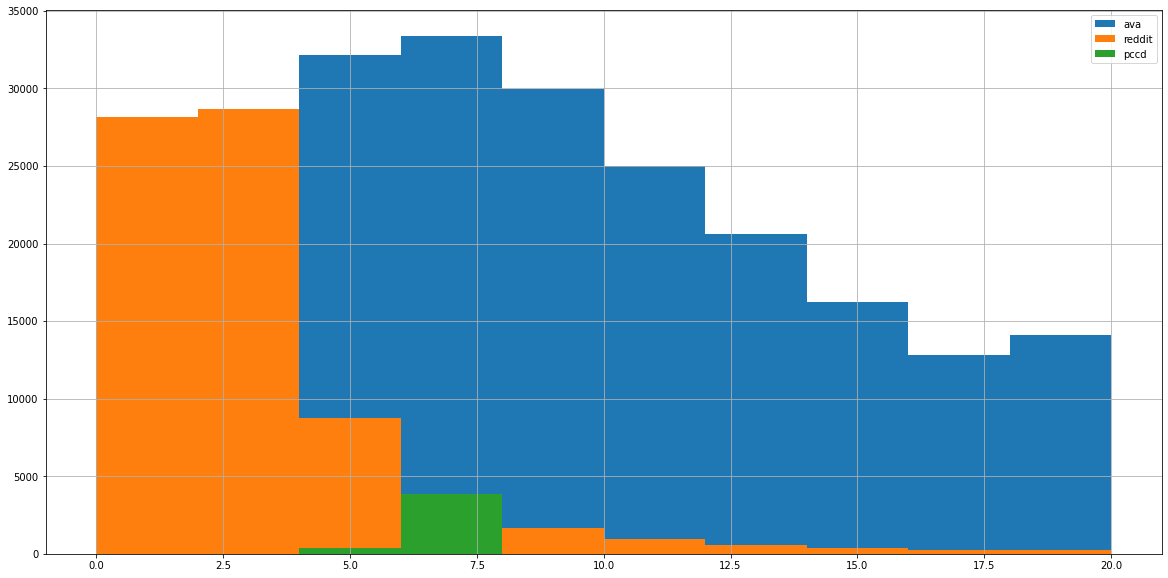

In [28]:
import pandas as pd
for name, data in ncomments.items():
    s = pd.Series(data, name=name)
    print(s.describe())
    s.hist(bins=10, range=[0, 20], figsize=(20,10), legend=True)

count    3.354044e+06
mean     1.570160e+01
std      1.701090e+01
min      1.000000e+00
25%      5.000000e+00
50%      1.100000e+01
75%      2.000000e+01
max      2.146000e+03
Name: ava, dtype: float64
count    219788.000000
mean         49.133720
std          55.505585
min           1.000000
25%          16.000000
50%          33.000000
75%          61.000000
max        1286.000000
Name: reddit, dtype: float64
count    28070.000000
mean        41.097186
std         41.656863
min          1.000000
25%         14.000000
50%         30.000000
75%         55.000000
max        780.000000
Name: pccd, dtype: float64


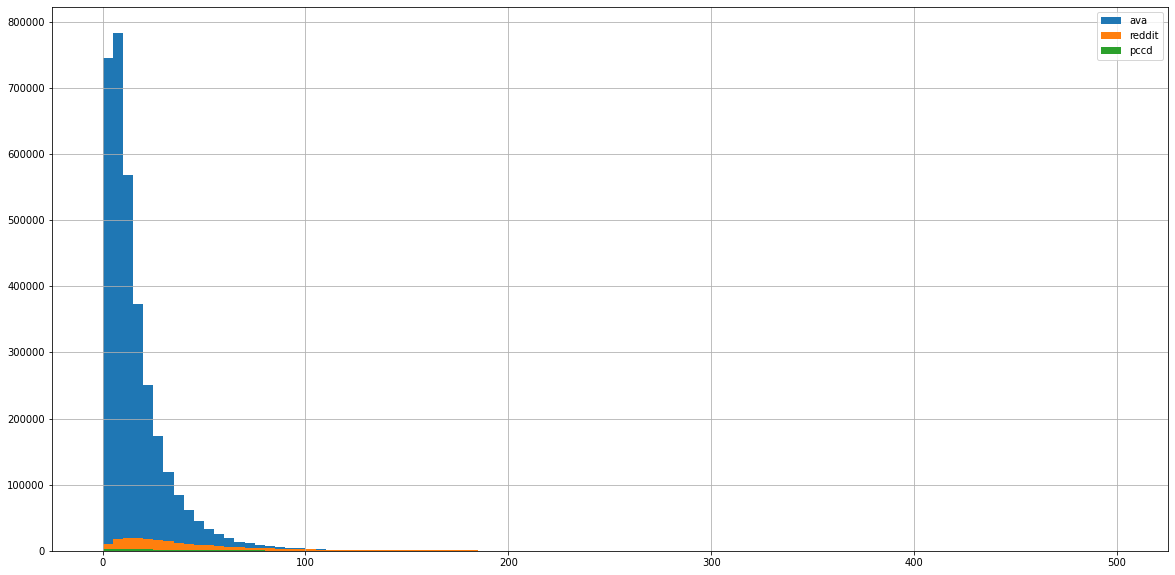

In [29]:
for name, data in nwords.items():
    s = pd.Series(data, name=name)
    print(s.describe())
    s.hist(bins=100, figsize=(20,10), legend=True, range=[0,500])

In [30]:
for i in range(5):
    print(dataset[i])


(None, {'im_id': '953417', 'im_score': 6.11290322581, 'query': 1396, 'im_name': '953417.jpg', 'comments': ["6.1! Nice! You have mad macro skills! You'll notice I don't have any... because I suck at it.", 'Frog with attitude; love it.  Reminds me of Jabba of Star Wars, lol. (voted earlier)', 'he does look kind of lonely. Funky colors.', "No thanks, he is quite blue is'nt he, I like this.", 'great shot!', 'Very cute!', 'Funny shot. Very nice perspective and lovely colors.'], 'sentiment': {0: {'Negative': 0.3295336663722992, 'Neutral': 0.2320113182067871, 'Positive': 0.4384550452232361}, 1: {'Negative': 0.005600472446531057, 'Neutral': 0.03543514013290405, 'Positive': 0.9589643478393555}, 2: {'Negative': 0.5221530795097351, 'Neutral': 0.4549880623817444, 'Positive': 0.022858841344714165}, 3: {'Negative': 0.03750083968043327, 'Neutral': 0.2324349284172058, 'Positive': 0.7300642728805542}, 4: {'Negative': 0.013107659295201302, 'Neutral': 0.0535711906850338, 'Positive': 0.9333211183547974}, 

count    253961.000000
mean          0.741391
std           0.169991
min           0.025458
25%           0.637067
50%           0.772274
75%           0.874148
max           0.993714
Name: ava, dtype: float64
count    73820.000000
mean         0.593810
std          0.251091
min          0.023793
25%          0.409367
50%          0.599006
75%          0.802716
max          0.993823
Name: reddit, dtype: float64
count    4235.000000
mean        0.745682
std         0.148654
min         0.108129
25%         0.662141
50%         0.770348
75%         0.855738
max         0.987247
Name: pccd, dtype: float64


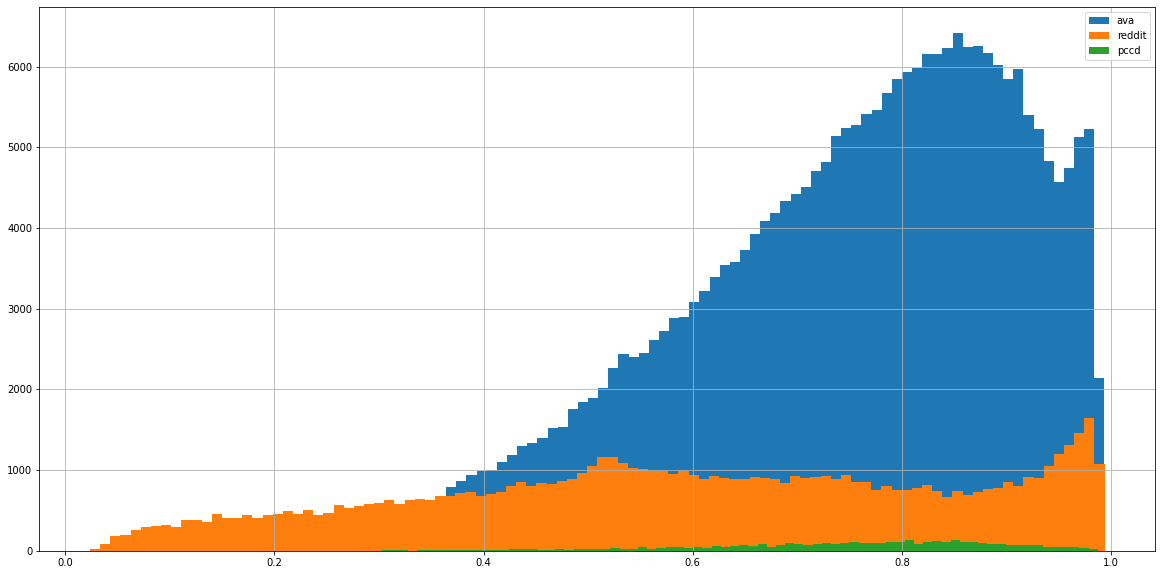

In [31]:
# Distribution of mean sentiment score per dataset

for name, data in sentiment_mean_score.items():
    s = pd.Series(data, name=name)
    print(s.describe())
    s.hist(bins=100, figsize=(20,10), legend=True)



count    253961.000000
mean          0.243858
std           0.110952
min           0.000000
25%           0.180615
50%           0.261050
75%           0.320977
max           0.679175
Name: ava, dtype: float64
count    73820.000000
mean         0.147314
std          0.158869
min          0.000000
25%          0.000000
50%          0.096461
75%          0.276079
max          0.678301
Name: reddit, dtype: float64
count    4235.000000
mean        0.225718
std         0.093999
min         0.000000
25%         0.161975
50%         0.234631
75%         0.296136
max         0.466233
Name: pccd, dtype: float64


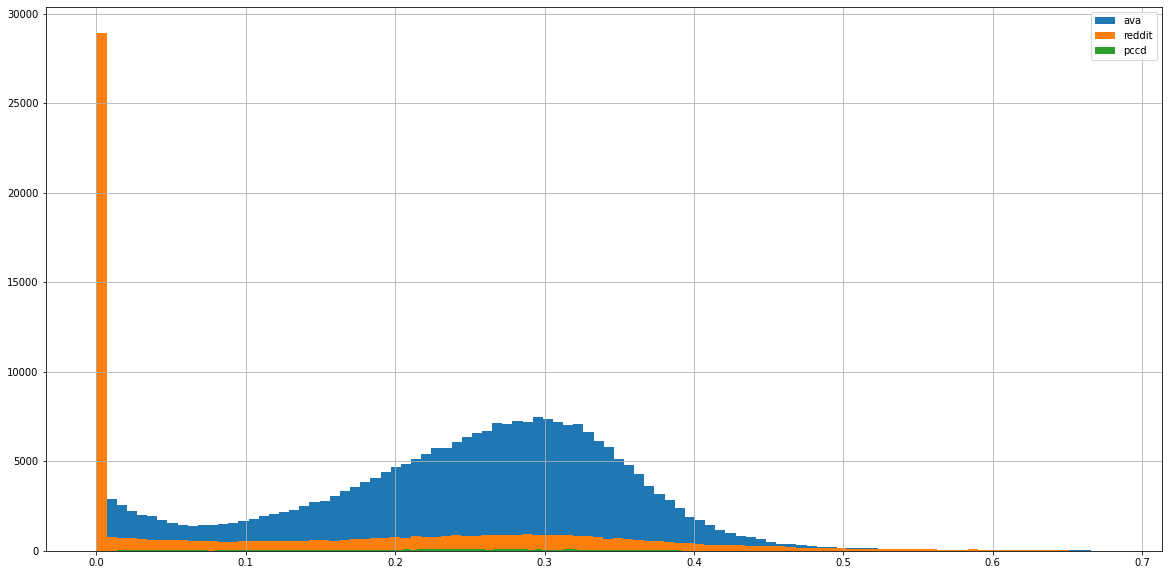

In [32]:
# Distribution of stdev sentiment score per dataset
# Reddit has a lot of images with only one comment, hence stdev=0
for name, data in sentiment_stdev_score.items():
    s = pd.Series(data, name=name)
    print(s.describe())
    s.hist(bins=100, figsize=(20,10), legend=True)

count    253961.000000
mean         13.206925
std          13.129594
min           1.000000
25%           6.000000
50%          10.000000
75%          16.000000
max         367.000000
Name: ava, dtype: float64
count    73820.00000
mean         2.97735
std          3.70015
min          1.00000
25%          1.00000
50%          2.00000
75%          3.00000
max        126.00000
Name: reddit, dtype: float64
count    4235.000000
mean        6.628099
std         0.647523
min         4.000000
25%         6.000000
50%         7.000000
75%         7.000000
max         7.000000
Name: pccd, dtype: float64


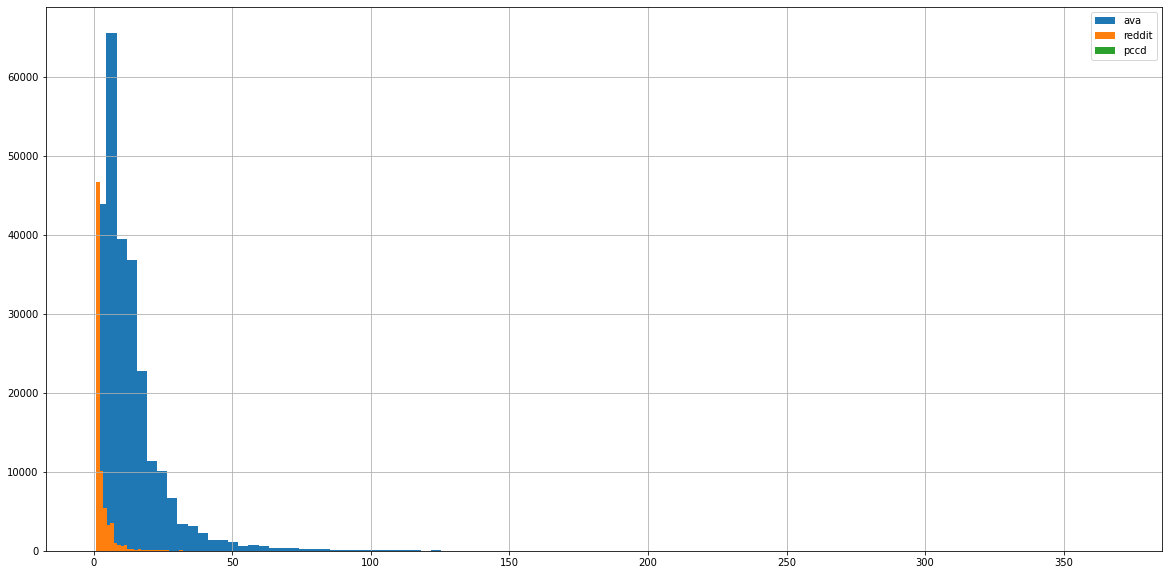

In [33]:
# Distribution of number of scores per dataset
# Reddit has a lot of images with only one comment, hence stdev=0
for name, data in sentiment_len_score.items():
    s = pd.Series(data, name=name)
    print(s.describe())
    s.hist(bins=100, figsize=(20,10), legend=True)

# BERTopic


In [34]:
from bertopic import BERTopic
from aestheval.data.datautils.data_cleaning import clean_text
from random import sample
topic_model_ava = BERTopic(nr_topics="auto")
topics, probs = topic_model_ava.fit_transform([clean_text(comment) for comment in sample(comments['ava'], 100000)])

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [35]:
topic_model_ava.get_topic_info()

,Topic,Count,Name
0,-1,35798,-1_focus_and_challenge_this
1,0,1417,0_her_she_face_shes
2,1,1170,1_flower_flowers_petals_leaf
3,2,1150,2_crop_cropped_tighter_cropping
4,3,1081,3_dog_cat_cats_dogs
...,...,...,...
867,874,10,874_ear_ears_counerbalance_refined
866,875,10,875_cards_pokercard_layouts_shuffled
865,876,10,876_blue_foolishness_pictogram_generations
864,870,10,870_tanja_work_congratulations_usual


In [36]:
print(topic_model_ava.get_topic_info().head(30)[['Topic', 'Count', 'Name']].to_latex(index=False))

\begin{tabular}{rrl}
\toprule
 Topic &  Count &                                        Name \\
\midrule
    -1 &  35798 &                 -1\_focus\_and\_challenge\_this \\
     0 &   1417 &                         0\_her\_she\_face\_shes \\
     1 &   1170 &                1\_flower\_flowers\_petals\_leaf \\
     2 &   1150 &             2\_crop\_cropped\_tighter\_cropping \\
     3 &   1081 &                         3\_dog\_cat\_cats\_dogs \\
     4 &    904 &                    4\_sky\_clouds\_cloud\_skies \\
     5 &    899 &               5\_title\_titles\_without\_titled \\
     6 &    810 &              6\_ribbon\_red\_congrats\_deserved \\
     7 &    786 &                7\_tree\_trees\_branches\_branch \\
     8 &    773 &                      8\_water\_drops\_fog\_rain \\
     9 &    747 &          9\_composition\_composed\_shot\_nicely \\
    10 &    714 &           10\_portrait\_self\_portraits\_candid \\
    11 &    687 &    11\_reflection\_reflections\_mirror\_mirrors \\

In [37]:
topic_model_ava.visualize_barchart(top_n_topics=24)

In [38]:
topic_model_reddit = BERTopic(nr_topics="auto")
topics, probs = topic_model_reddit.fit_transform([clean_text(comment) for comment in sample(comments['reddit'], 100000)])

In [39]:
topic_model_reddit.get_topic_info()

,Topic,Count,Name
0,-1,43491,-1_and_the_to_is
1,0,3441,0_her_she_face_hair
2,1,2770,1_horizon_tree_trees_straighten
3,2,2423,2_bird_dog_cat_birds
4,3,1971,3_sky_clouds_cloud_blue
...,...,...,...
506,510,10,510_gritty_snowblowers_stoke_favd
505,511,10,511_grass_horizon_gravel_shouty
503,513,10,513_jug_simpleif_fiel_hangup
502,508,10,508_blanket_motivated_moody_misintentioned


In [40]:
print(topic_model_reddit.get_topic_info().head(30)[['Topic', 'Count', 'Name']].to_latex(index=False))

\begin{tabular}{rrl}
\toprule
 Topic &  Count &                                     Name \\
\midrule
    -1 &  43491 &                         -1\_and\_the\_to\_is \\
     0 &   3441 &                      0\_her\_she\_face\_hair \\
     1 &   2770 &          1\_horizon\_tree\_trees\_straighten \\
     2 &   2423 &                     2\_bird\_dog\_cat\_birds \\
     3 &   1971 &                  3\_sky\_clouds\_cloud\_blue \\
     4 &   1367 &            4\_crop\_cropped\_square\_tighter \\
     5 &   1218 &  5\_building\_buildings\_tower\_architecture \\
     6 &   1217 &                        6\_his\_him\_he\_face \\
     7 &   1064 &                 7\_where\_taken\_live\_place \\
     8 &    888 &            8\_flower\_flowers\_petals\_focus \\
     9 &    821 &       9\_water\_reflection\_exposure\_puddle \\
    10 &    782 &                 10\_boat\_boats\_ship\_water \\
    11 &    728 &       11\_please\_titles\_examples\_specific \\
    12 &    675 &                  12\_ca

In [41]:
topic_model_reddit.visualize_barchart(top_n_topics=24)

In [43]:
topic_model_pccd = BERTopic(nr_topics="auto")
topics, probs = topic_model_pccd.fit_transform([clean_text(comment) for comment in comments['pccd']])

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [44]:
topic_model_pccd.get_topic_info()

,Topic,Count,Name
0,-1,12585,-1_the_and_of_to
1,0,1256,0_hi_you_work_image
2,1,690,1_flower_flowers_petals_rose
3,2,641,2_her_eyes_she_face
4,3,497,3_exposure_speed_shutter_water
...,...,...,...
204,203,11,203_lion_shutter_deer_monopod
205,204,10,204_cropped_extend_frame_margins
206,205,10,205_pelican_pelicans_buoys_wildlife
207,206,10,206_iphone_phone_cameras_limitations


In [45]:
print(topic_model_pccd.get_topic_info().head(30)[['Topic', 'Count', 'Name']].to_latex(index=False))

\begin{tabular}{rrl}
\toprule
 Topic &  Count &                                       Name \\
\midrule
    -1 &  12585 &                           -1\_the\_and\_of\_to \\
     0 &   1256 &                        0\_hi\_you\_work\_image \\
     1 &    690 &               1\_flower\_flowers\_petals\_rose \\
     2 &    641 &                        2\_her\_eyes\_she\_face \\
     3 &    497 &             3\_exposure\_speed\_shutter\_water \\
     4 &    469 &                  4\_bird\_birds\_feathers\_the \\
     5 &    451 &             5\_sharp\_focus\_looks\_resolution \\
     6 &    434 &          6\_field\_depth\_shallow\_appropriate \\
     7 &    417 &        7\_subject\_interesting\_matter\_choice \\
     8 &    372 &                8\_color\_lighting\_colors\_sky \\
     9 &    365 &                  9\_tree\_trees\_branches\_the \\
    10 &    347 &            10\_child\_baby\_children\_daughter \\
    11 &    326 &                 11\_iso\_noise\_speed\_shutter \\
    12 &    2

In [46]:
topic_model_pccd.visualize_barchart(top_n_topics=24)